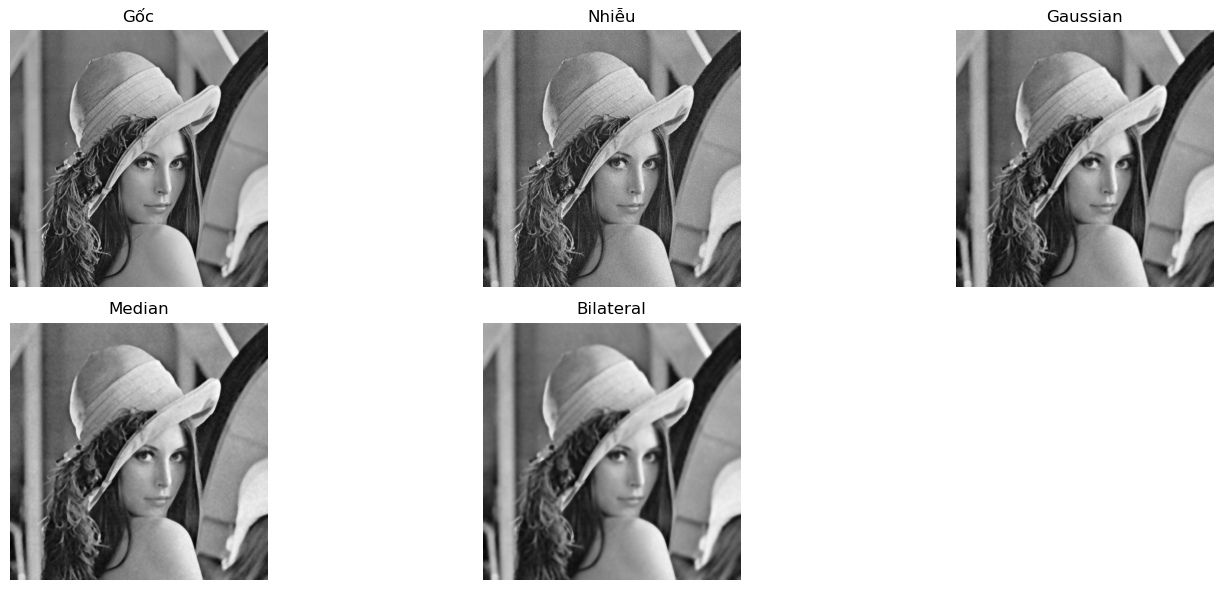

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request

# Tải ảnh từ URL
url = "https://raw.githubusercontent.com/opencv/opencv/master/samples/data/lena.jpg"
resp = urllib.request.urlopen(url)
image = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Chuyển sang ảnh xám
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Thêm nhiễu
noise = np.random.randint(0, 100, gray.shape, dtype='uint8')
noisy = cv2.addWeighted(gray, 0.8, noise, 0.2, 0)

# Các bộ lọc
gaussian = cv2.GaussianBlur(noisy, (5,5), 0)
median = cv2.medianBlur(noisy, 5)
bilateral = cv2.bilateralFilter(noisy, 9, 75, 75)

# Hiển thị
titles = ['Gốc', 'Nhiễu', 'Gaussian', 'Median', 'Bilateral']
images = [gray, noisy, gaussian, median, bilateral]

plt.figure(figsize=(15,6))
for i in range(5):
    plt.subplot(2,3,i+1)
    plt.imshow(images[i], cmap='gray')
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()
